In [1]:
import pandas as pd
import numpy as np

Recommendations.csv into pd 
//Get Info

In [3]:
recommendation_pd = pd.read_csv("../data/raw/recommendations.csv")
recommendation_pd.head()

recommendation_pd.info()
recommendation_pd.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 661471 entries, 0 to 661470
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   app_id          661471 non-null  int64  
 1   helpful         661471 non-null  int64  
 2   funny           661471 non-null  int64  
 3   date            661471 non-null  object 
 4   is_recommended  661471 non-null  bool   
 5   hours           661471 non-null  float64
 6   user_id         661471 non-null  int64  
 7   review_id       661471 non-null  int64  
dtypes: bool(1), float64(1), int64(5), object(1)
memory usage: 36.0+ MB


(661471, 8)

Log Transform for hours attr

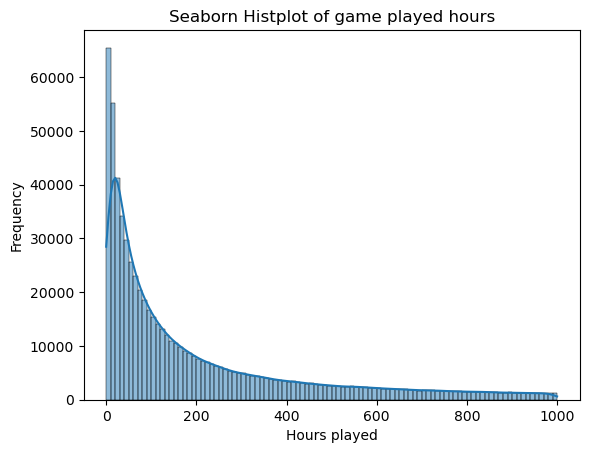

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(recommendation_pd['hours'], bins=100, kde=True) # bins=100 for more detail
plt.title('Seaborn Histplot of game played hours') # Title
plt.xlabel('Hours played') # X-axis label
plt.ylabel('Frequency') # Y-axis label
plt.show()

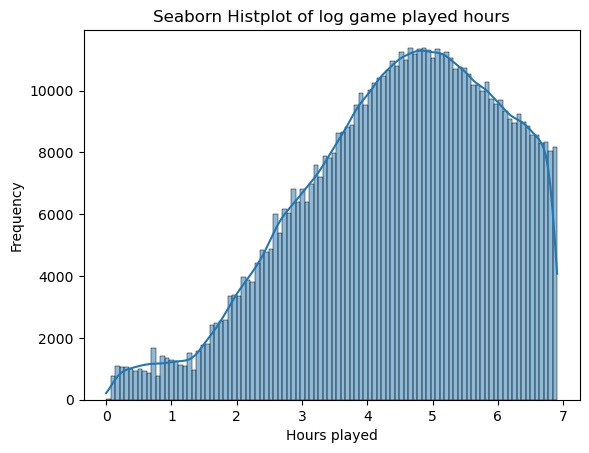

In [ ]:
recommendation_pd_cp = recommendation_pd.copy()
recommendation_pd_cp['hours_log'] = recommendation_pd['hours'].apply(np.log1p)

sns.histplot(recommendation_pd_cp['hours_log'], bins=100, kde=True) # bins=100 for more detail
plt.title('Seaborn Histplot of log game played hours') # Title
plt.xlabel('Hours played') # X-axis label
plt.ylabel('Frequency') # Y-axis label
plt.show()

Scaling for hours attr

In [8]:
from sklearn.preprocessing import StandardScaler
scaler_standard = StandardScaler()
recommendation_pd_cp[['hours_scaled']] = scaler_standard.fit_transform(recommendation_pd[['hours']])

recommendation_pd = recommendation_pd_cp.copy()

recommendation_pd.head()

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id,hours_log,hours_scaled
0,975370,0,0,12/12/2022,True,36.3,51580,0,3.618993,-0.696320
1,304390,4,0,2/17/2017,False,11.5,2586,1,2.525729,-0.801043
2,1085660,2,0,11/17/2019,True,336.5,253880,2,5.821566,0.571332
3,703080,0,0,9/23/2022,True,27.4,259432,3,3.346389,-0.733902
4,526870,0,0,1/10/2021,True,7.9,23869,4,2.186051,-0.816244


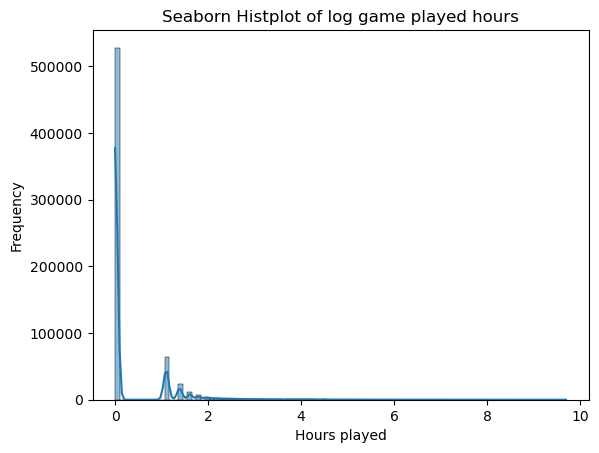

In [21]:
recommendation_pd_cp = recommendation_pd.copy()
recommendation_pd_cp['helpful_scaled'] = recommendation_pd['helpful'].apply(np.log1p)

sns.histplot(recommendation_pd_cp['helpful_scaled'], bins=100, kde=True) # bins=100 for more detail
plt.title('Seaborn Histplot of log game played hours') # Title
plt.xlabel('Hours played') # X-axis label
plt.ylabel('Frequency') # Y-axis label
plt.show()

Helpful per hour
#high value: helpful but spend less time
#low value: not helpful but spend much time

In [10]:
recommendation_pd['helpful_per_hour'] = recommendation_pd['helpful'] / (recommendation_pd['hours'] + 1)
recommendation_pd[['hours', 'helpful', 'helpful_per_hour']].head()

,hours,helpful,helpful_per_hour
0,36.3,0,0.000000
1,11.5,4,0.320000
2,336.5,2,0.005926
3,27.4,0,0.000000
4,7.9,0,0.000000


Funny per hour
#High value: Short playtime but review is funny
#Low value: Long playtime but review is not funny

In [12]:
recommendation_pd['funny_per_hour'] = recommendation_pd['funny'] / (recommendation_pd['hours'] + 1)
recommendation_pd[['hours', 'funny', 'funny_per_hour']].head()

,hours,funny,funny_per_hour
0,36.3,0,0.0
1,11.5,0,0.0
2,336.5,0,0.0
3,27.4,0,0.0
4,7.9,0,0.0


Helpful funny ratio
#high value: review helpful, long playtime
#low value: review funny, short playtime

In [ ]:
recommendation_pd['helpful_funny_hour_ratio'] = (recommendation_pd['helpful'] + 1) / (recommendation_pd['funny'] + 1) * recommendation_pd['hours']
recommendation_pd[[]].head()

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id,hours_log,hours_scaled,helpful_per_hour,funny_per_hour,helpful_funny_hour_ratio
0,975370,0,0,12/12/2022,True,36.3,51580,0,3.618993,-0.696320,0.000000,0.0,36.3
1,304390,4,0,2/17/2017,False,11.5,2586,1,2.525729,-0.801043,0.320000,0.0,57.5
2,1085660,2,0,11/17/2019,True,336.5,253880,2,5.821566,0.571332,0.005926,0.0,1009.5
3,703080,0,0,9/23/2022,True,27.4,259432,3,3.346389,-0.733902,0.000000,0.0,27.4
4,526870,0,0,1/10/2021,True,7.9,23869,4,2.186051,-0.816244,0.000000,0.0,7.9


Convert date to year, month, day

In [15]:
recommendation_pd['date'] = pd.to_datetime(recommendation_pd['date'])
recommendation_pd['year'] = recommendation_pd['date'].dt.year
recommendation_pd['month'] = recommendation_pd['date'].dt.month
recommendation_pd['day'] = recommendation_pd['date'].dt.day
recommendation_pd[['app_id', 'date','year', 'month', 'day']].head()

,app_id,date,year,month,day
0,975370,2022-12-12,2022,12,12
1,304390,2017-02-17,2017,2,17
2,1085660,2019-11-17,2019,11,17
3,703080,2022-09-23,2022,9,23
4,526870,2021-01-10,2021,1,10


is_recommend to 0 and 1

In [ ]:
recommendation_pd['is_recommended_binary'] = recommendation_pd['is_recommended'].astype(int)
print(recommendation_pd['is_recommended_binary'].unique())

recommendation_pd[['is_recommended', 'is_recommended_binary']].head()

[1 0]


,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id,hours_log,hours_scaled,helpful_per_hour,funny_per_hour,helpful_funny_hour_ratio,year,month,day,is_recommended_binary
0,975370,0,0,2022-12-12,True,36.3,51580,0,3.618993,-0.696320,0.000000,0.0,36.3,2022,12,12,1
1,304390,4,0,2017-02-17,False,11.5,2586,1,2.525729,-0.801043,0.320000,0.0,57.5,2017,2,17,0
2,1085660,2,0,2019-11-17,True,336.5,253880,2,5.821566,0.571332,0.005926,0.0,1009.5,2019,11,17,1
3,703080,0,0,2022-09-23,True,27.4,259432,3,3.346389,-0.733902,0.000000,0.0,27.4,2022,9,23,1
4,526870,0,0,2021-01-10,True,7.9,23869,4,2.186051,-0.816244,0.000000,0.0,7.9,2021,1,10,1


MI score

In [17]:
from sklearn.feature_selection import mutual_info_regression
features_for_mi = recommendation_pd[[
    'helpful',  
    'funny',  
    'hours',  
    'year',  
    'month',  
    'day',  
    'hours_scaled',  
    'hours_log',  
    'helpful_per_hour',  
    'funny_per_hour',  
    'helpful_funny_hour_ratio'  
]]

target_variable = recommendation_pd['is_recommended_binary']

def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y, discrete_features='auto', random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores_ratios = make_mi_scores(features_for_mi, target_variable)
print(mi_scores_ratios)

helpful_per_hour            0.042220
helpful                     0.038696
helpful_funny_hour_ratio    0.027271
hours                       0.020273
hours_log                   0.019405
hours_scaled                0.019105
year                        0.009503
funny_per_hour              0.009423
funny                       0.007828
month                       0.002125
day                         0.001944
Name: MI Scores, dtype: float64


Aggregation 

In [30]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression

# Aggregation: Grouping by 'app_id' (game-level insights)
aggregated_pd = recommendation_pd.groupby('app_id').agg({
    'helpful': ['sum', 'mean'],
    'funny': ['sum', 'mean'],
    'hours': ['sum', 'mean', 'count'],
    'is_recommended_binary': ['sum', 'mean'],
    'year': ['mean'],
    'month': ['mean'],
    'day': ['mean']
}).reset_index()

aggregated_pd.head()

# # Rename columns for clarity
# aggregated_pd.columns = ['app_id', 'helpful_sum', 'helpful_mean', 
#                          'funny_sum', 'funny_mean', 
#                          'hours_sum', 'hours_mean', 'review_count',
#                          'is_recommended_sum', 'is_recommended_mean', 
#                          'year_mean', 'month_mean', 'day_mean']

# # Create new feature ratios
# aggregated_pd['helpful_ratio'] = (aggregated_pd['helpful_sum'] + 1) / (aggregated_pd['review_count'] + 1)
# aggregated_pd['funny_ratio'] = (aggregated_pd['funny_sum'] + 1) / (aggregated_pd['review_count'] + 1)
# aggregated_pd['helpful_funny_ratio'] = (aggregated_pd['helpful_sum'] + 1) / (aggregated_pd['funny_sum'] + 1)
# aggregated_pd['hours_per_review'] = (aggregated_pd['hours_sum'] + 1) / (aggregated_pd['review_count'] + 1)

# # Define Features and Target
# features_for_mi = aggregated_pd.drop(columns=['app_id', 'is_recommended_mean'])  # Features
# target_variable = aggregated_pd['is_recommended_mean']  # Target variable

# # Compute MI Scores
# mi_scores_ratios = make_mi_scores(features_for_mi, target_variable)
# print(mi_scores_ratios)


app_id helpful             funny                 hours                     \
             sum       mean    sum       mean        sum        mean  count   
0    440   26849  68.492347   9591  24.466837   178332.6  454.930102    392   
1    550   13187  10.457573   5560   4.409199   286676.2  227.340365   1261   
2    570   40494   6.116918  20900   3.157100  2984700.4  450.861088   6620   
3    730   71029   3.819379  31607   1.699575  7717378.6  414.979760  18597   
4   4000   32460   8.497382  22926   6.001571  1212976.0  317.532984   3820   

  is_recommended_binary                   year     month        day  
                    sum      mean         mean      mean       mean  
0                   338  0.862245  2016.770408  7.022959  16.553571  
1                  1245  0.987312  2017.528152  7.006344  17.209358  
2                  5643  0.852417  2017.480514  6.806798  16.407100  
3                 16158  0.868850  2018.961123  6.772329  16.117492  
4                  3760  0.984293  2018.545026  6.711780  16.235864

A

In [19]:
import pandas as pd # Make sure pandas is imported

# List of columns to EXCLUDE from the new DataFrame (these are the engineered features)
columns_to_exclude = [
    'helpful',
    'funny',
    'date',
    'is_recommended'
]

# Get all column names from the original games_pd DataFrame
all_columns = recommendation_pd.columns.tolist()

# Find columns to KEEP (columns that are in 'all_columns' but NOT in 'columns_to_exclude')
columns_to_keep = [col for col in all_columns if col not in columns_to_exclude]

# Create a new DataFrame 'games_pd_feat_engined' by selecting only the columns to keep
recommendation_pd_feat_engined = recommendation_pd[columns_to_keep].copy() # Use .copy()

recommendation_pd_feat_engined.head()

,app_id,hours,user_id,review_id,hours_log,hours_scaled,helpful_per_hour,funny_per_hour,helpful_funny_hour_ratio,year,month,day,is_recommended_binary
0,975370,36.3,51580,0,3.618993,-0.696320,0.000000,0.0,36.3,2022,12,12,1
1,304390,11.5,2586,1,2.525729,-0.801043,0.320000,0.0,57.5,2017,2,17,0
2,1085660,336.5,253880,2,5.821566,0.571332,0.005926,0.0,1009.5,2019,11,17,1
3,703080,27.4,259432,3,3.346389,-0.733902,0.000000,0.0,27.4,2022,9,23,1
4,526870,7.9,23869,4,2.186051,-0.816244,0.000000,0.0,7.9,2021,1,10,1
